In [1]:
from google.colab import files
uploaded = files.upload()


Saving loan_approval_dataset (1).csv to loan_approval_dataset (1).csv


importing required libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set(style="whitegrid")


Load and explore dataset

In [17]:
df = pd.read_csv("loan_approval_dataset (1).csv")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns)
df.head()


Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


missing values and heatmap

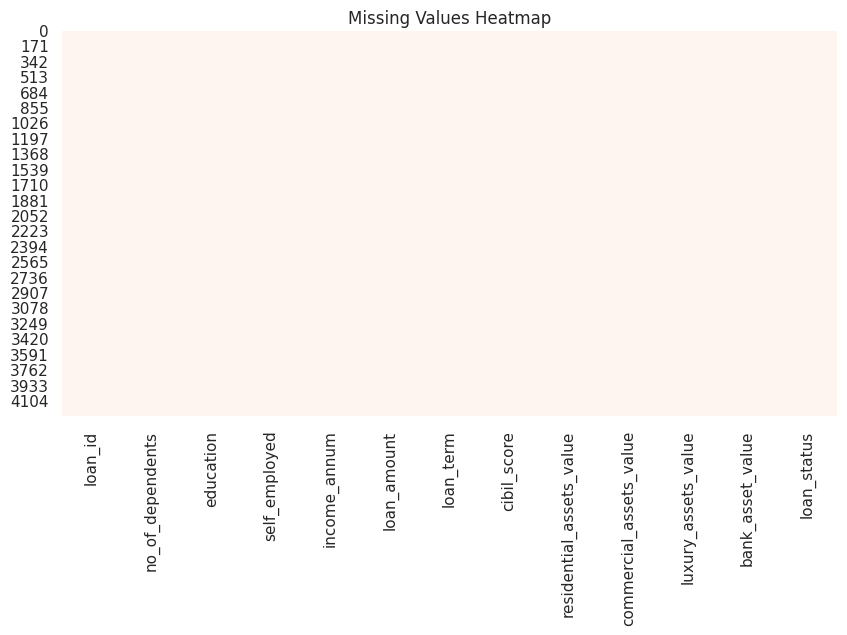

In [18]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Values Heatmap")
plt.show()


Data preprocessing

In [20]:
df.ffill(inplace=True)

# Encoding categorical variables
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])
df['loan_status'] = le.fit_transform(df['loan_status'])


Feature distribution(based on each aspect)

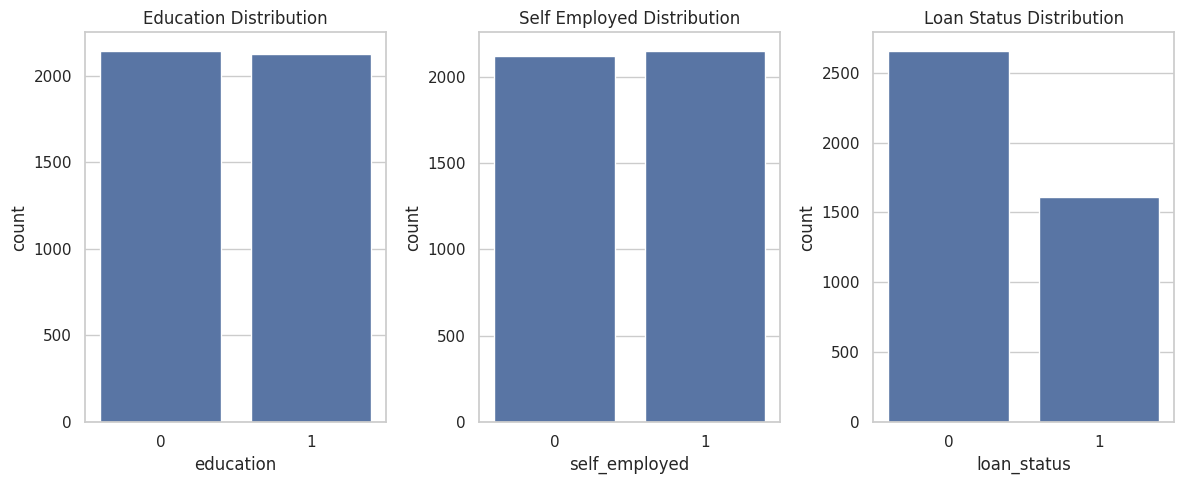

In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='education', data=df)
plt.title("Education Distribution")

plt.subplot(1, 3, 2)
sns.countplot(x='self_employed', data=df)
plt.title("Self Employed Distribution")

plt.subplot(1, 3, 3)
sns.countplot(x='loan_status', data=df)
plt.title("Loan Status Distribution")

plt.tight_layout()
plt.show()


correlation heatmap

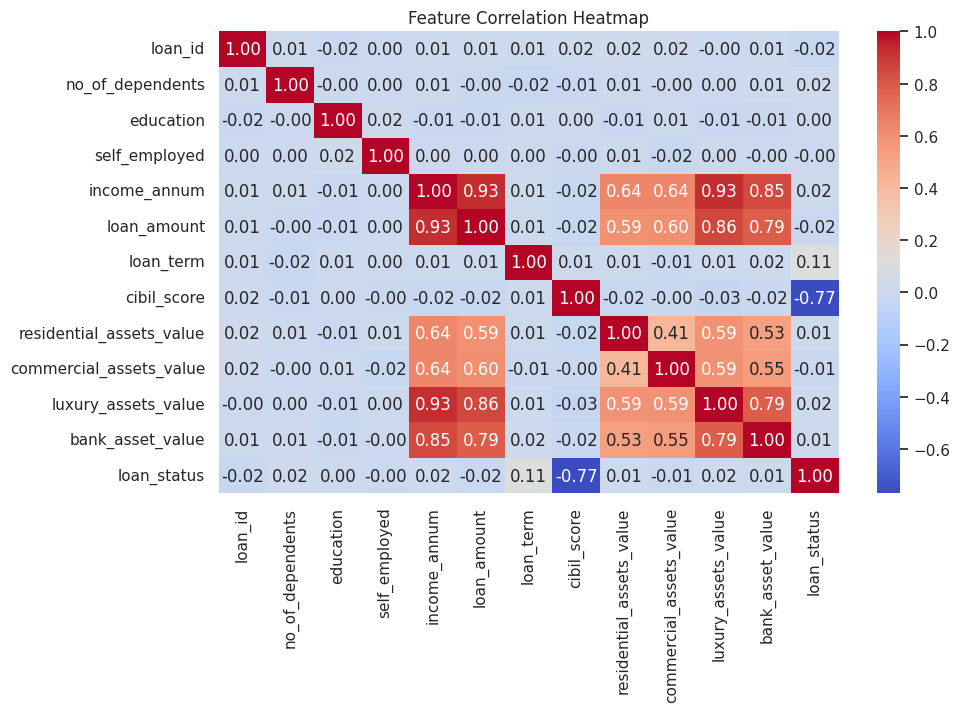

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


feature selection

In [23]:
X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']


Train test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Feature Scaling

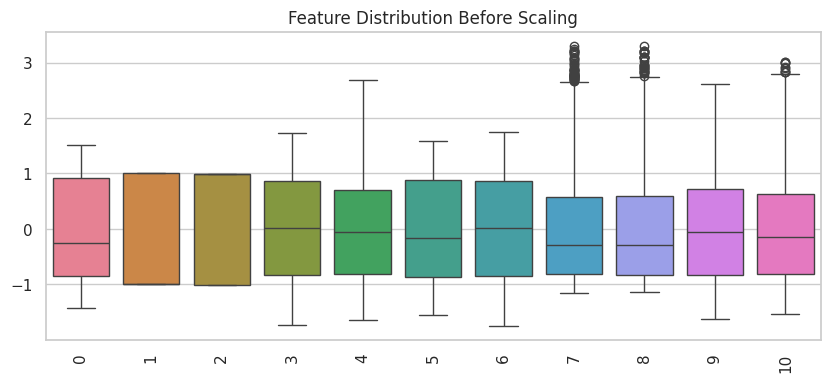

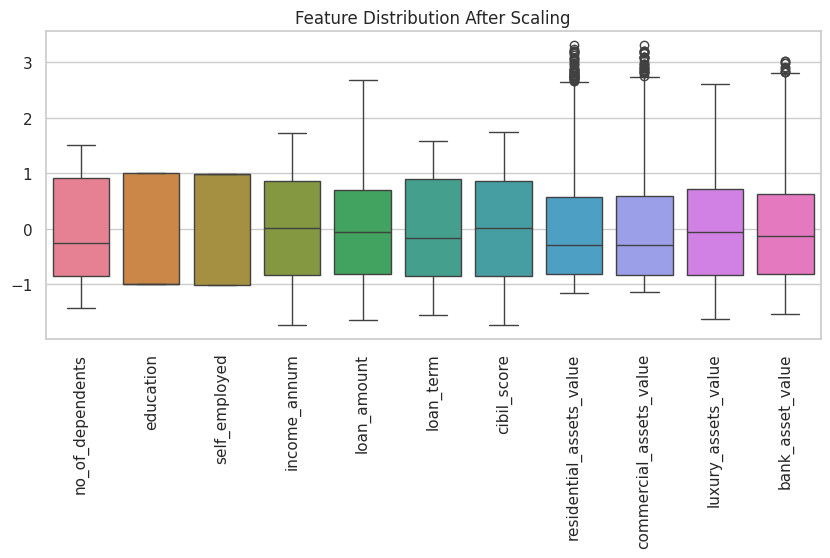

In [24]:
scaler = StandardScaler()

# Before Scaling
plt.figure(figsize=(10, 4))
sns.boxplot(data=X_train)
plt.title("Feature Distribution Before Scaling")
plt.xticks(rotation=90)
plt.show()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# After Scaling
plt.figure(figsize=(10, 4))
sns.boxplot(data=pd.DataFrame(X_train, columns=X.columns))
plt.title("Feature Distribution After Scaling")
plt.xticks(rotation=90)
plt.show()


Model Training

In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Model Evaluation

Accuracy Score: 0.977751756440281

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



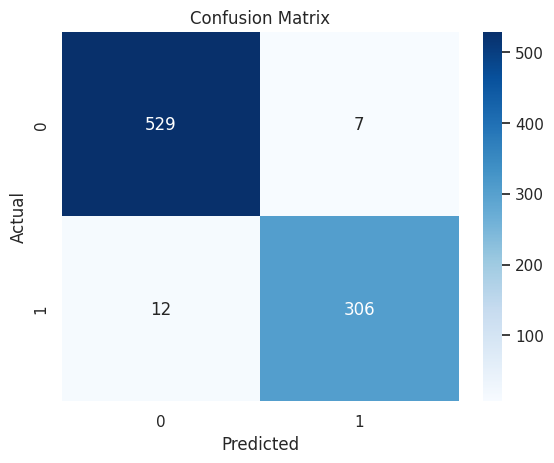

In [25]:
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


feature importance graph

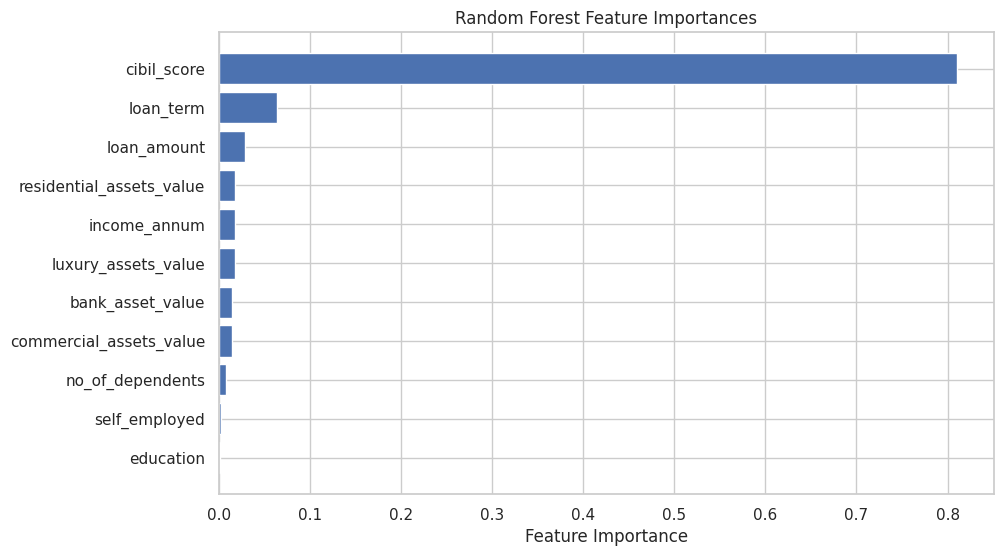

In [26]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()
